In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('./data/training.json', 'r') as f:
    train = json.load(f)

with open('./data/test.json', 'r') as f:
    test = json.load(f)
    
with open('./data/validation.json', 'r') as f:
    validation = json.load(f)
    

In [22]:
df_train = pd.DataFrame(train)
df_train.head()

,text,stars
0,The hotel I was staying in recommended this pl...,1.0
1,The worst customer service~Spend 2 hours & 35 ...,1.0
2,I have an appointment and I see people coming ...,1.0
3,I usually really like Milestones but this one ...,1.0
4,First off I would like to say that my first ma...,1.0


In [23]:
df_test = pd.DataFrame(test)
df_test.head()

,text,stars
0,"I decided to review the Euc because, well, I s...",3.0
1,Great location in Kensington and good waffles....,3.0
2,Tout le monde va chez Schwartz mais j'ai mangé...,3.0
3,"Not as big as some of the ones in town, but it...",3.0
4,Meat dishes better than the starch dishes. Gel...,3.0


In [24]:
df_validation = pd.DataFrame(validation)
df_validation.head()


,text,stars
0,I USED to brag about Urban Beans to everyone I...,1.0
1,I really liked my first experience here. Unfor...,1.0
2,Literally shit. Do yourself a favor and go to ...,1.0
3,"This place was terrible. Healthy is great, but...",1.0
4,"Came a Saturday morning, wasn't busy. Tables ...",1.0


Train Dataset - 16000 samples
stars
1.0    0.2
2.0    0.2
3.0    0.2
4.0    0.2
5.0    0.2
Name: proportion, dtype: float64


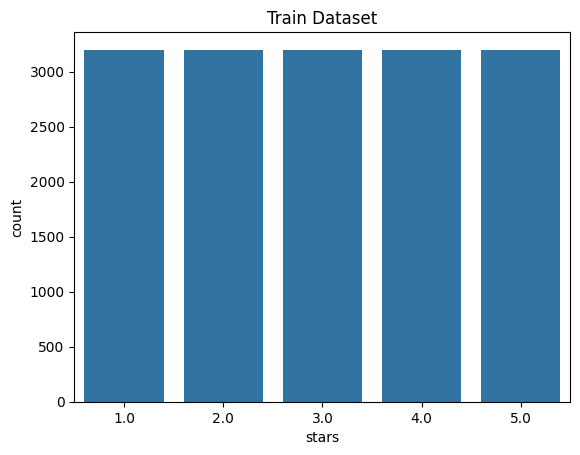

Test Dataset - 800 samples
stars
4.0    0.4
5.0    0.4
3.0    0.2
Name: proportion, dtype: float64


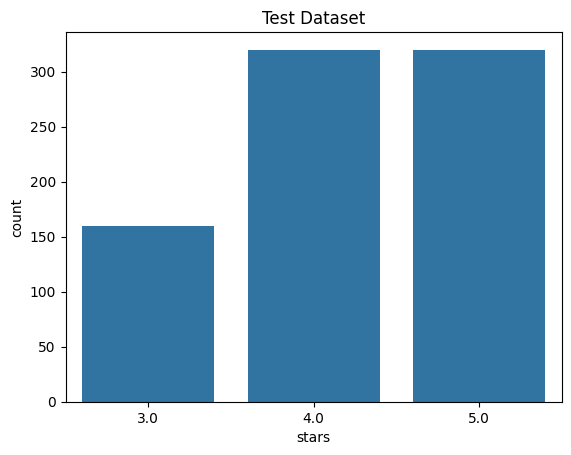

Validation Dataset - 800 samples
stars
1.0    0.4
2.0    0.4
3.0    0.2
Name: proportion, dtype: float64


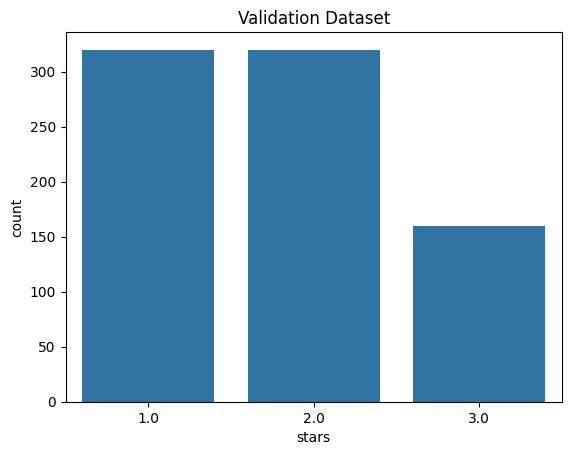

In [27]:
dfs = [df_train, df_test, df_validation]
labels = ["Train", "Test", "Validation"]

for i, df in enumerate(dfs):
    print(f"{labels[i]} Dataset - {df.shape[0]} samples")
    print(df['stars'].value_counts(normalize=True))
    df['length'] = df['text'].apply(len)
    sns.countplot(data=df, x='stars')
    plt.title(f"{labels[i]} Dataset")
    plt.show()


In [12]:
df['length'] = df['text'].apply(len)
df['length'].describe()


count    16000.000000
mean       670.414500
std        612.377822
min         11.000000
25%        268.000000
50%        486.000000
75%        867.000000
max       4999.000000
Name: length, dtype: float64

In [13]:
df.head()

,text,stars,length
0,The hotel I was staying in recommended this pl...,1.0,1164
1,The worst customer service~Spend 2 hours & 35 ...,1.0,743
2,I have an appointment and I see people coming ...,1.0,303
3,I usually really like Milestones but this one ...,1.0,1323
4,First off I would like to say that my first ma...,1.0,803


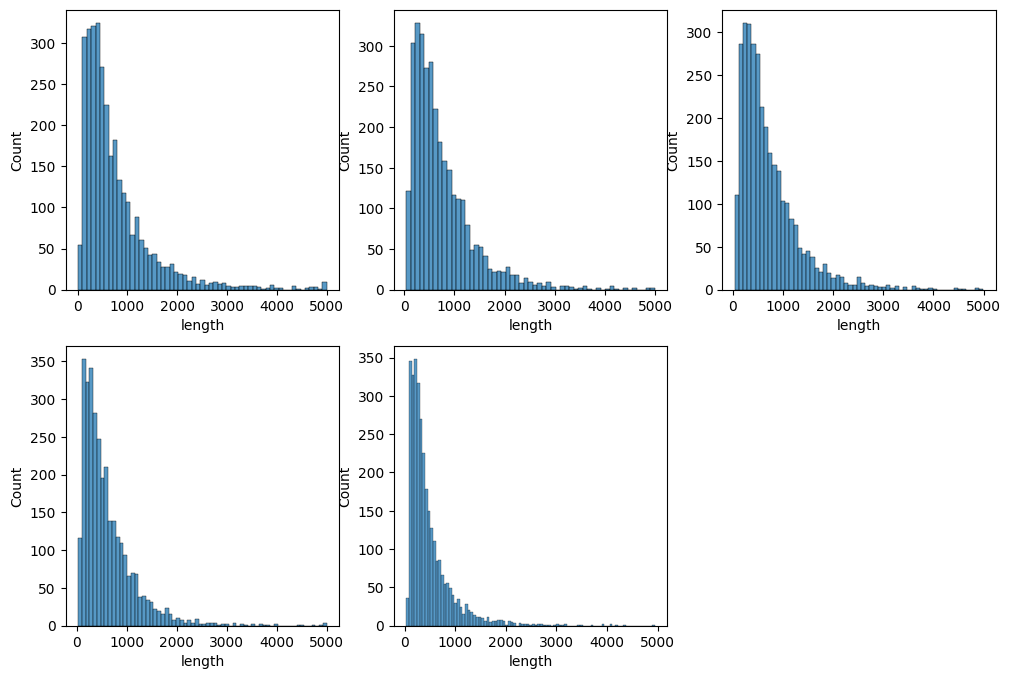

In [20]:
plt.figure(figsize=(12, 8))
for i in range(1, 6):
    plt.subplot(2, 3, i)
    sns.histplot(data=df[df['stars'] == i], x='length');
